# Logistic Regression

In [23]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,10)

In [24]:
players = pd.read_csv('playerStats111.csv')
players.head()


,Player,Kills,Deaths,ADR,KAST%,Rating,Pro
0,4216,22,19,85.0,69.0,1.17,1
1,3543,26,23,83.5,58.6,1.10,1
2,3972,20,23,78.2,75.9,1.02,1
3,2476,17,20,68.1,79.3,0.97,0
4,2299,17,20,66.3,65.5,0.86,0


In [25]:
players.isnull().sum()

Player    0
Kills     0
Deaths    0
ADR       0
KAST%     0
Rating    0
Pro       0
dtype: int64

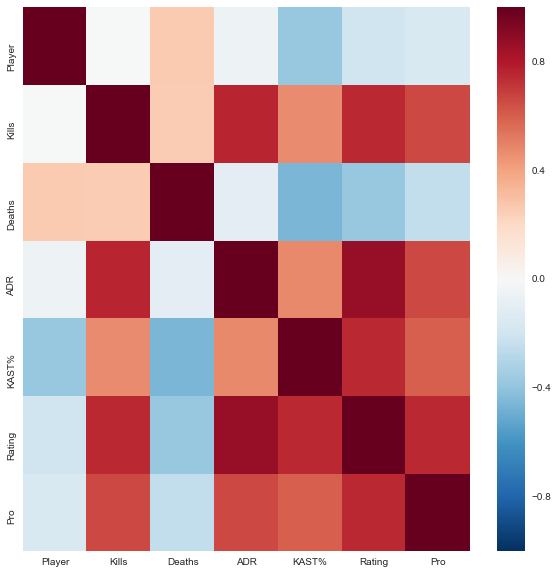

In [26]:
sns.heatmap(players.corr())

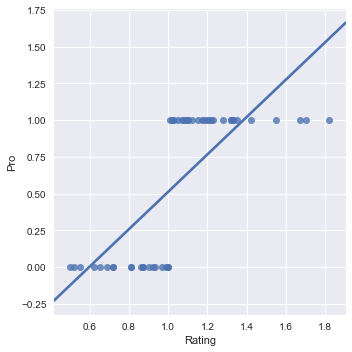

In [27]:
sns.lmplot(x='Rating', y='Pro', data=players, ci=None)

In [28]:
players.corr()

,Player,Kills,Deaths,ADR,KAST%,Rating,Pro
Player,1.000000,-0.004998,0.257870,-0.053436,-0.376126,-0.198362,-0.163866
Kills,-0.004998,1.000000,0.256024,0.765051,0.470334,0.753879,0.657990
Deaths,0.257870,0.256024,1.000000,-0.105919,-0.453669,-0.376482,-0.249182
ADR,-0.053436,0.765051,-0.105919,1.000000,0.479232,0.874770,0.657700
KAST%,-0.376126,0.470334,-0.453669,0.479232,1.000000,0.756500,0.601062
Rating,-0.198362,0.753879,-0.376482,0.874770,0.756500,1.000000,0.757203
Pro,-0.163866,0.657990,-0.249182,0.657700,0.601062,0.757203,1.000000


In [29]:
X= players.iloc[:,:-1].values
Y= players.iloc[:,6].values

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
Y_train, Y_test

(array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]),
 array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]))

In [31]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test, Y_pred)

0.84615384615384615

In [34]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80         6
          1       0.78      1.00      0.88         7

avg / total       0.88      0.85      0.84        13



In [35]:
rmse_logistic = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse_logistic

0.39223227027636809

In [36]:
logistic_predicted = pd.DataFrame([])
logistic_predicted = logistic_predicted.append(pd.DataFrame({'Y_test':Y_test, 'Y_pred' :Y_pred}), ignore_index=True)
logistic_predicted.head()

,Y_pred,Y_test
0,0,0
1,1,0
2,1,1
3,1,1
4,0,0


# KFOLD

In [37]:
from sklearn.model_selection import KFold
#X= players.iloc[:,2:6].values
#Y= players.iloc[:,6].values
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [38]:
test= list()
from sklearn.linear_model import LogisticRegression
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]    
    regressor =LogisticRegression()
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    print("TRAIN", train_index, "TEST", test_index)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    print(rmse)
    test.append(rmse)
print(test)



TRAIN [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48] TEST [0 1 2 3 4 5 6 7 8 9]
0.632455532034
TRAIN [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48] TEST [10 11 12 13 14 15 16 17 18 19]
0.0
TRAIN [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48] TEST [20 21 22 23 24 25 26 27 28 29]
0.316227766017
TRAIN [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 40 41 42 43 44 45 46 47 48] TEST [30 31 32 33 34 35 36 37 38 39]
0.4472135955
TRAIN [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST [40 41 42 43 44 45 46 47 48]
0.333333333333
[0.63245553203367588, 0.0, 0.31622776601683794, 0.44721359549995793, 0.33333333333333331]


In [39]:
kfold_avg = np.mean(test)
print(kfold_avg)


0.345846045377


In [40]:
Y_mean=np.mean(Y_test)
Y_mean

0.66666666666666663

In [41]:
print("The RMSE of Logistic Regression is %.5f" %rmse_logistic)
print("The RMSE of Cross_Validation using K-fold is %.5f" %kfold_avg)

The RMSE of Logistic Regression is 0.39223
The RMSE of Cross_Validation using K-fold is 0.34585


Is the relationship significant?
Yes, relationship is significant
    
Are any model assumptions violated?  
No, model assumptions not violated
    
Cross-validate the model. How well did it do?
No improvement in my model by using K-fold